<a href="https://colab.research.google.com/github/swastikbanerjee/DL_Lab/blob/main/dlLab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2
import random
from keras.applications.resnet50 import ResNet50
import tensorflow as tf
import scipy as sp
from keras import backend as K
import keras.applications.inception_v3 as inception_v3
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
datasetA_train_path = '/content/drive/MyDrive/DATASETS/Lab7 Dataset/chest_xray/train'
datasetA_test_path = '/content/drive/MyDrive/DATASETS/Lab7 Dataset/chest_xray/test'
train = ImageDataGenerator(rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,brightness_range=[1.0,2.0],rotation_range=20,validation_split=0.2)
train_generatorA= train.flow_from_directory(datasetA_train_path,target_size=(180, 180),batch_size=32,class_mode='categorical',subset='training')
test_generatorA= train.flow_from_directory(datasetA_test_path,target_size=(180,180),batch_size=32,class_mode = 'categorical',subset='validation',shuffle=True)
print("Class indices:")
print(train_generatorA.class_indices)

Found 2808 images belonging to 2 classes.
Found 0 images belonging to 2 classes.
Class indices:
{'NORMAL': 0, 'PNEUMONIA': 1}


In [ ]:
datasetB_path = '/content/drive/MyDrive/DATASETS/Lab7 Dataset/TB_Chest_Radiography_Database'
train = ImageDataGenerator(rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,brightness_range=[1.0,2.0],rotation_range=20,validation_split=0.2)
train_generatorB = train.flow_from_directory(datasetB_path,target_size=(180, 180),batch_size=32,class_mode='categorical',subset='training')
test_generatorB = train.flow_from_directory(datasetB_path,target_size=(180,180),batch_size=32,class_mode = 'categorical',subset='validation',shuffle=True)
print("Class indices:")
print(train_generatorB.class_indices)

Found 3363 images belonging to 2 classes.
Found 840 images belonging to 2 classes.
Class indices:
{'Normal': 0, 'Tuberculosis': 1}


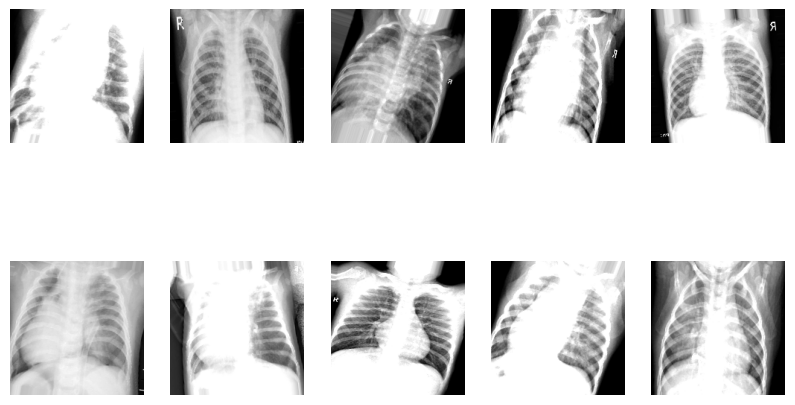

In [ ]:
#Visualize some of the augmented images from Dataset A
x_batch, y_batch = next(train_generatorA)
fig, axs = plt.subplots(2, 5,figsize=(10,6))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(x_batch[i])
    ax.axis('off')
plt.show()

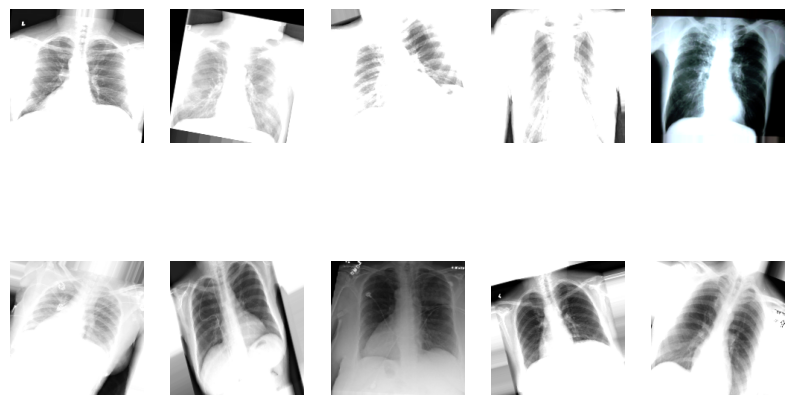

In [ ]:
#Visualize some of the augmented images from Dataset B
x_batch, y_batch = next(train_generatorB)
fig, axs = plt.subplots(2, 5,figsize=(10,6))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(x_batch[i])
    ax.axis('off')
plt.show()

# 2. ResNet and Custom CNN Architecture Implementation:
# ResNet:
- Implement a ResNet architecture, focusing on residual blocks with skip connections.
- Include batch normalization after each convolutional layer to stabilize and accelerate training.
- Incorporate dropout layers to prevent overfitting.

For Dataset A

In [ ]:
model_resnetA = ResNet50(input_shape=(180,180,3), include_top=False, weights='imagenet')
model_resnetB = ResNet50(input_shape=(180,180,3), include_top=False, weights='imagenet')

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in model_resnetA.layers:
   layer.trainable=False
   model_resnetA.summary()

Streaming output truncated to the last 5000 lines.
 conv4_block2_1_bn (BatchNo  (None, 12, 12, 256)          1024      ['conv4_block2_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block2_1_relu (Activ  (None, 12, 12, 256)          0         ['conv4_block2_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block2_2_conv (Conv2  (None, 12, 12, 256)          590080    ['conv4_block2_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block2_2_bn (BatchNo  (None, 12, 12, 256)          

In [ ]:
modelA = Sequential()
modelA.add(model_resnetA)
modelA.add(Flatten())
modelA.add(Dense(512, activation='relu'))
modelA.add(Dropout(0.5))
modelA.add(Dense(2, activation='sigmoid'))
modelA.summary()

In [ ]:
modelA.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=modelA.fit(train_generatorA, epochs=5, validation_data=test_generatorA)

# Custom CNN:
- Design a custom CNN architecture for chest X-ray classification.
- Integrate convolutional layers, max-pooling layers, and fully connected layers.
- Utilize batch normalization after convolutional layers and dropout layers to enhance model generalization and prevent overfitting.

# 3. Training:
- Split both datasets into training, validation, and test sets.
- Configure training pipelines for ResNet and the custom CNN, utilizing appropriate optimizers and learning rate schedules.
- Train models with iterative forward and backward passes, updating parameters to minimize loss.

# 4.Evaluation:

- Evaluate the trained ResNet and custom CNN models on the test sets of Dataset A and Dataset B.
- Compute evaluation metrics such as accuracy, precision, recall, and F1-score to assess performance.
- Visualize predictions and analyze error patterns.

# 5.Comparison
Analyze and compare the performances of ResNet and the custom CNN on both Dataset A and
Dataset B. Assess their accuracies in detecting various thoracic conditions, considering the
impact of incorporating batch normalization and dropout layers. Explore differences in
classification accuracy and error patterns between the models.